In [112]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [113]:
stock_returns = pd.read_csv("Data/returns_monthly.csv")
stock_returns = stock_returns.dropna(how="any")
stock_returns

,PERMNO,date,TICKER,vwretd
1,15732,2015-10-30,XLRE,0.073937
2,15732,2015-11-30,XLRE,0.002404
3,15732,2015-12-31,XLRE,-0.022209
4,15732,2016-01-29,XLRE,-0.057085
5,15732,2016-02-29,XLRE,0.000620
...,...,...,...,...
1375,86458,2024-08-30,XLU,0.021572
1376,86458,2024-09-30,XLU,0.020969
1377,86458,2024-10-31,XLU,-0.008298
1378,86458,2024-11-29,XLU,0.064855


In [114]:
tickers = set(list(stock_returns["TICKER"]))
print(tickers)

{'XLF', 'SPY', 'XLP', 'XLE', 'XLV', 'XLI', 'XLU', 'XLK', 'XLC', 'XLRE', 'XLY'}


In [115]:
# Pivot the DataFrame to have tickers as columns and date as the index
stock_returns_pivoted = stock_returns.pivot(index='date', columns='TICKER', values='vwretd')

# Display the pivoted DataFrame
# stock_returns_pivoted = stock_returns_pivoted.drop(columns=["NaN"])
stock_returns_pivoted

TICKER,SPY,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
date,,,,,,,,,,,
2014-01-31,-0.030020,NaN,-0.030020,-0.030020,-0.030020,-0.030020,-0.030020,NaN,-0.030020,-0.030020,-0.030020
2014-02-28,0.046198,NaN,0.046198,0.046198,0.046198,0.046198,0.046198,NaN,0.046198,0.046198,0.046198
2014-03-31,0.004540,NaN,0.004540,0.004540,0.004540,0.004540,0.004540,NaN,0.004540,0.004540,0.004540
2014-04-30,0.001573,NaN,0.001573,0.001573,0.001573,0.001573,0.001573,NaN,0.001573,0.001573,0.001573
2014-05-30,0.020254,NaN,0.020254,0.020254,0.020254,0.020254,0.020254,NaN,0.020254,0.020254,0.020254
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572
2024-09-30,0.020969,0.020969,0.020969,0.020969,0.020969,0.020969,0.020969,0.020969,0.020969,0.020969,0.020969
2024-10-31,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298


In [116]:
treasuries = pd.read_csv("Data/nikhilesh_treasury_2.csv")
treasuries = treasuries[(treasuries["caldt"]>="2014-01-31") & (treasuries["caldt"]<="2024-12-31")]
treasuries = treasuries.set_index("caldt")
treasuries = treasuries.rename_axis("date")
treasuries

,t30ret
date,
2014-01-31,0.000012
2014-02-28,0.000045
2014-03-31,0.000028
2014-04-30,0.000015
2014-05-30,0.000008
...,...
2024-08-30,0.004419
2024-09-30,0.004619
2024-10-31,0.003907


In [117]:
consolidated_data = pd.merge(stock_returns_pivoted,treasuries,left_index=True,right_index=True)
consolidated_data

,SPY,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,t30ret
date,,,,,,,,,,,,
2014-01-31,-0.030020,NaN,-0.030020,-0.030020,-0.030020,-0.030020,-0.030020,NaN,-0.030020,-0.030020,-0.030020,0.000012
2014-02-28,0.046198,NaN,0.046198,0.046198,0.046198,0.046198,0.046198,NaN,0.046198,0.046198,0.046198,0.000045
2014-03-31,0.004540,NaN,0.004540,0.004540,0.004540,0.004540,0.004540,NaN,0.004540,0.004540,0.004540,0.000028
2014-04-30,0.001573,NaN,0.001573,0.001573,0.001573,0.001573,0.001573,NaN,0.001573,0.001573,0.001573,0.000015
2014-05-30,0.020254,NaN,0.020254,0.020254,0.020254,0.020254,0.020254,NaN,0.020254,0.020254,0.020254,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.004419
2024-09-30,0.020969,0.020969,0.020969,0.020969,0.020969,0.020969,0.020969,0.020969,0.020969,0.020969,0.020969,0.004619
2024-10-31,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,0.003907


In [118]:
sector_returns = ['XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV', 'XLY']
stock_returns = sector_returns+['SPY']

for ticker in stock_returns:
    consolidated_data[ticker+' XR'] = consolidated_data[ticker]-consolidated_data['t30ret']

excess_returns_tickers = [sr+' XR' for sr in sector_returns]

consolidated_data

,SPY,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,...,XLE XR,XLF XR,XLI XR,XLK XR,XLP XR,XLRE XR,XLU XR,XLV XR,XLY XR,SPY XR
date,,,,,,,,,,,,,,,,,,,,,
2014-01-31,-0.030020,NaN,-0.030020,-0.030020,-0.030020,-0.030020,-0.030020,NaN,-0.030020,-0.030020,...,-0.030032,-0.030032,-0.030032,-0.030032,-0.030032,NaN,-0.030032,-0.030032,-0.030032,-0.030032
2014-02-28,0.046198,NaN,0.046198,0.046198,0.046198,0.046198,0.046198,NaN,0.046198,0.046198,...,0.046153,0.046153,0.046153,0.046153,0.046153,NaN,0.046153,0.046153,0.046153,0.046153
2014-03-31,0.004540,NaN,0.004540,0.004540,0.004540,0.004540,0.004540,NaN,0.004540,0.004540,...,0.004512,0.004512,0.004512,0.004512,0.004512,NaN,0.004512,0.004512,0.004512,0.004512
2014-04-30,0.001573,NaN,0.001573,0.001573,0.001573,0.001573,0.001573,NaN,0.001573,0.001573,...,0.001558,0.001558,0.001558,0.001558,0.001558,NaN,0.001558,0.001558,0.001558,0.001558
2014-05-30,0.020254,NaN,0.020254,0.020254,0.020254,0.020254,0.020254,NaN,0.020254,0.020254,...,0.020246,0.020246,0.020246,0.020246,0.020246,NaN,0.020246,0.020246,0.020246,0.020246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,...,0.017153,0.017153,0.017153,0.017153,0.017153,0.017153,0.017153,0.017153,0.017153,0.017153
2024-09-30,0.020969,0.020969,0.020969,0.020969,0.020969,0.020969,0.020969,0.020969,0.020969,0.020969,...,0.016350,0.016350,0.016350,0.016350,0.016350,0.016350,0.016350,0.016350,0.016350,0.016350
2024-10-31,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,-0.008298,...,-0.012205,-0.012205,-0.012205,-0.012205,-0.012205,-0.012205,-0.012205,-0.012205,-0.012205,-0.012205


In [119]:
print("XR ticksers", excess_returns_tickers)
saved_betas = {}
for er_ticker in excess_returns_tickers:
    X = consolidated_data['SPY XR']
    y = consolidated_data[er_ticker]
    mini_df = pd.DataFrame({"X":X, "y":y})
    mini_df = mini_df.dropna(how="any")
    X = mini_df['X']
    y = mini_df['y']

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())
    print(model.params)
    saved_betas[er_ticker] = model.params.iloc[1]

XR ticksers ['XLC XR', 'XLE XR', 'XLF XR', 'XLI XR', 'XLK XR', 'XLP XR', 'XLRE XR', 'XLU XR', 'XLV XR', 'XLY XR']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.284e+33
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        13:13:00   Log-Likelihood:                 2962.6
No. Observations:                  79   AIC:                            -5921.
Df Residuals:                      77   BIC:                            -5916.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [120]:


means = []
for ert in excess_returns_tickers:
    mean = (consolidated_data[ert].mean())*12
    avg_xr[ert] = mean
    means.append(mean)

new_betas = [saved_betas[ert] for ert in excess_returns_tickers]

avg_xr = pd.DataFrame({"tickers":excess_returns_tickers,"avg_xr":means, "betas":new_betas})

avg_xr = avg_xr.set_index("tickers")
avg_xr

,avg_xr,betas
tickers,,
XLC XR,0.110102,1.0
XLE XR,0.103848,1.0
XLF XR,0.103848,1.0
XLI XR,0.103848,1.0
XLK XR,0.103848,1.0
XLP XR,0.103848,1.0
XLRE XR,0.119170,1.0
XLU XR,0.103848,1.0
XLV XR,0.103848,1.0


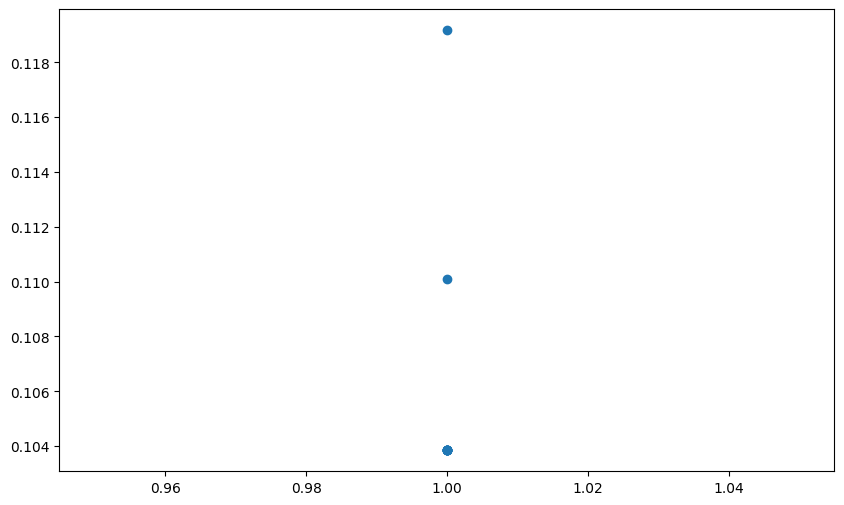

In [121]:
plt.figure(figsize=(10, 6))
plt.scatter(avg_xr['betas'], avg_xr['avg_xr'])


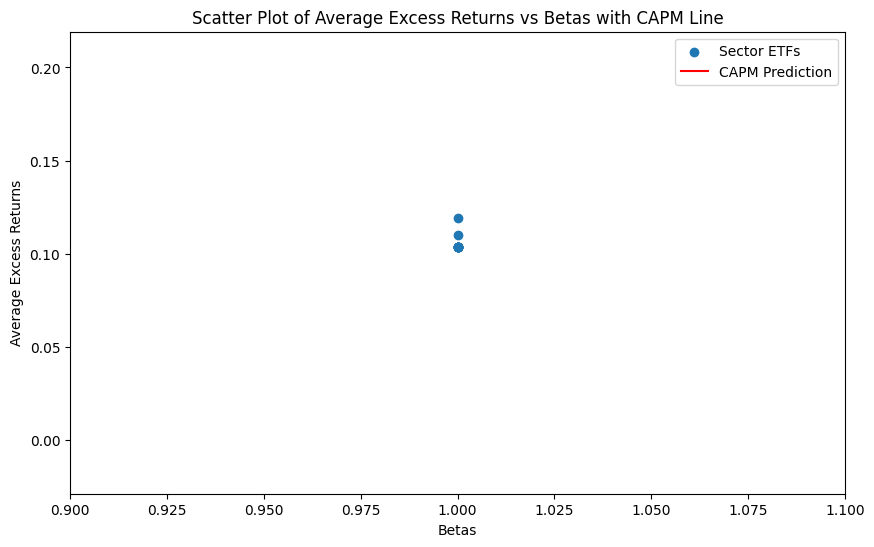

In [122]:
import numpy as np

risk_free_rate = consolidated_data['t30ret'].mean()

equity_premium = 0.07

x_values = np.array([avg_xr['betas'].min(), avg_xr['betas'].max()])
capm_line = risk_free_rate + equity_premium * x_values

plt.figure(figsize=(10, 6))
plt.scatter(avg_xr['betas'], avg_xr['avg_xr'], label='Sector ETFs')
plt.plot(x_values, capm_line, color='red', label='CAPM Prediction')

plt.xlim(x_values.min() - 0.1, x_values.max() + 0.1)
plt.ylim(min(avg_xr['avg_xr'].min(), capm_line.min()) - 0.1, max(avg_xr['avg_xr'].max(), capm_line.max()) + 0.1)

plt.xlabel('Betas')
plt.ylabel('Average Excess Returns')
plt.title('Scatter Plot of Average Excess Returns vs Betas with CAPM Line')
plt.legend()
plt.show()

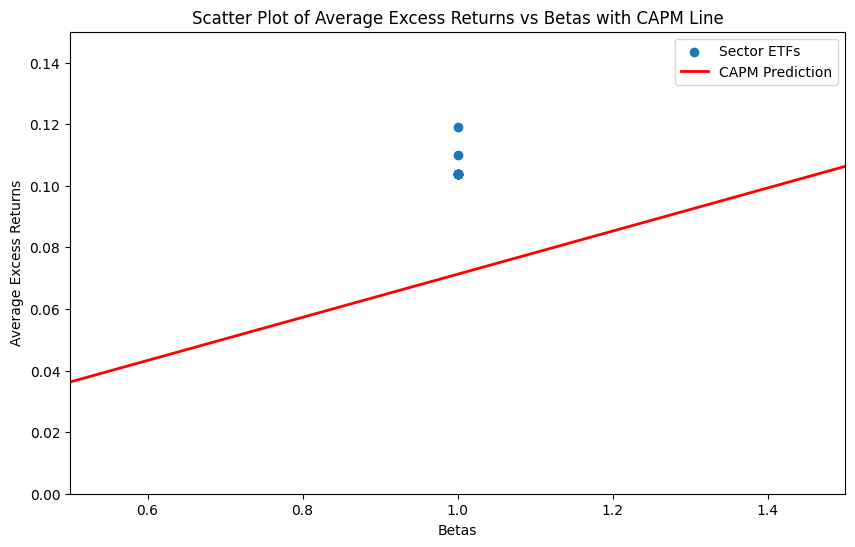

In [125]:
import numpy as np

risk_free_rate = consolidated_data['t30ret'].mean()
equity_premium = 0.07

x_values = np.array([0.5, 1.5])
capm_line = risk_free_rate + equity_premium * x_values


plt.figure(figsize=(10, 6))
plt.scatter(avg_xr['betas'], avg_xr['avg_xr'], label='Sector ETFs')
plt.plot(x_values, capm_line, color='red', linewidth=2, label='CAPM Prediction')

plt.xlim(0.5, 1.5)
plt.ylim(0, 0.15)

plt.xlabel('Betas')
plt.ylabel('Average Excess Returns')
plt.title('Scatter Plot of Average Excess Returns vs Betas with CAPM Line')
plt.legend()
plt.show()
